In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy

In [2]:
df=pd.read_csv('magicbricks_Ready_to_Move_Flats_50_Pages.csv')

In [3]:
df.head()

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
0,807.0,2 BHK,Unfurnished,Bathroom 2,Sudarshan Paradise,65 Lac,NaN,Ready to Move
1,973.0,3 BHK,Unfurnished,Bathroom 3,Shapoorji Pallonji Sensorium,1.32 Cr,NaN,NaN
2,640.0,2 BHK,NaN,Bathroom 2,Forest Hills,37 Lac,7 out of 7,Ready to Move
3,894.0,2 BHK,NaN,Bathroom 2,Kundan Espacio,1.20 Cr,3 out of 13,Ready to Move
4,560.0,1 BHK,NaN,Bathroom 1,Tarangan Apartment,90 Lac,2 out of 3,Ready to Move


In [4]:
df.shape

(1500, 8)

In [5]:
df.isnull().sum()

,0
Area,1
Property,0
Furnished Status,23
Bathroom,1
Society,5
Price,0
Floor,18
Status,2


In [6]:
df.describe()

,Area
count,1499.000000
mean,602.056704
std,239.551799
min,87.000000
25%,438.000000
50%,562.000000
75%,702.000000
max,3096.000000


In [7]:
# so the property and price don't have missing value
df.dropna(axis=1)

,Property,Price
0,2 BHK,65 Lac
1,3 BHK,1.32 Cr
2,2 BHK,37 Lac
3,2 BHK,1.20 Cr
4,1 BHK,90 Lac
...,...,...
1495,2 BHK,80 Lac
1496,1 BHK,30 Lac
1497,1 BHK,40 Lac
1498,1 BHK,32 Lac


<Axes: >

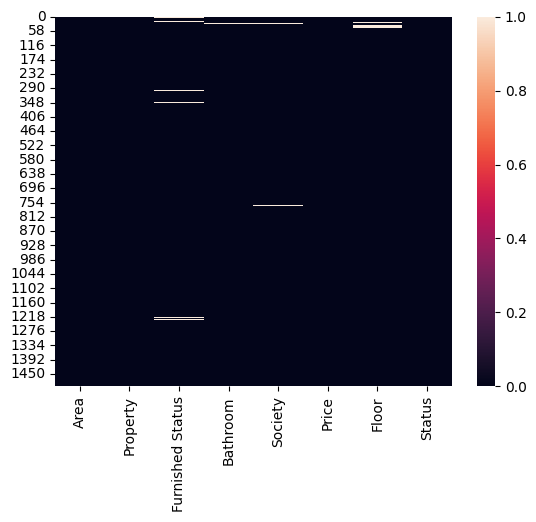

In [8]:
sns.heatmap(df.isnull())

In [9]:
df = df.dropna(subset=['Floor'])

In [10]:
df = df.dropna(subset=['Status'])

In [11]:
df = df.dropna(subset=['Society'])

In [12]:
df = df.dropna(subset=['Bathroom'])

In [13]:
df = df.dropna(subset=['Furnished Status'])

In [14]:
df = df.dropna(subset=['Area'])

In [15]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
7,392.0,1 BHK,Unfurnished,Bathroom 1,Ishwar River Residency,32 Lac,12 out of 12,Ready to Move
8,471.0,1 BHK,Unfurnished,Bathroom 1,Kohinoor Majesty,21.5 Lac,5 out of 9,Ready to Move
9,525.0,1 BHK,Unfurnished,Bathroom 1,Sancheti Pratik Nagar,28 Lac,1 out of 3,Ready to Move
11,517.0,1 BHK,Unfurnished,Bathroom 1,Blossom,35 Lac,2 out of 11,Ready to Move
13,645.0,1 BHK,Unfurnished,Bathroom 2,Raga Homes,37 Lac,10 out of 11,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,Bathroom 2,Tropical Palms,80 Lac,1 out of 15,Ready to Move
1496,403.0,1 BHK,Semi-Furnished,Bathroom 1,Lotus Apartment,30 Lac,3 out of 4,Ready to Move
1497,454.0,1 BHK,Unfurnished,Bathroom 1,Florida Minis,40 Lac,2 out of 5,Ready to Move
1498,491.0,1 BHK,Unfurnished,Bathroom 1,Swaraj Complex,32 Lac,1 out of 7,Ready to Move


In [16]:
def convert_cr_to_lac_clean(price):
    if isinstance(price, str):
        if 'Cr' in price:
            cr_value = float(price.split()[0])
            lac_value = cr_value * 100
            return f"{lac_value:.0f} Lac"
        elif 'Lac' in price:
            return price
    return price

df['Price'] = df['Price'].apply(convert_cr_to_lac_clean)

In [17]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
7,392.0,1 BHK,Unfurnished,Bathroom 1,Ishwar River Residency,32 Lac,12 out of 12,Ready to Move
8,471.0,1 BHK,Unfurnished,Bathroom 1,Kohinoor Majesty,21.5 Lac,5 out of 9,Ready to Move
9,525.0,1 BHK,Unfurnished,Bathroom 1,Sancheti Pratik Nagar,28 Lac,1 out of 3,Ready to Move
11,517.0,1 BHK,Unfurnished,Bathroom 1,Blossom,35 Lac,2 out of 11,Ready to Move
13,645.0,1 BHK,Unfurnished,Bathroom 2,Raga Homes,37 Lac,10 out of 11,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,Bathroom 2,Tropical Palms,80 Lac,1 out of 15,Ready to Move
1496,403.0,1 BHK,Semi-Furnished,Bathroom 1,Lotus Apartment,30 Lac,3 out of 4,Ready to Move
1497,454.0,1 BHK,Unfurnished,Bathroom 1,Florida Minis,40 Lac,2 out of 5,Ready to Move
1498,491.0,1 BHK,Unfurnished,Bathroom 1,Swaraj Complex,32 Lac,1 out of 7,Ready to Move


In [18]:
df['Price'].isnull().sum()

np.int64(0)

In [19]:
df['Price'] = df['Price'].str.replace('Lac', '', regex=False).str.strip()


In [20]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
7,392.0,1 BHK,Unfurnished,Bathroom 1,Ishwar River Residency,32,12 out of 12,Ready to Move
8,471.0,1 BHK,Unfurnished,Bathroom 1,Kohinoor Majesty,21.5,5 out of 9,Ready to Move
9,525.0,1 BHK,Unfurnished,Bathroom 1,Sancheti Pratik Nagar,28,1 out of 3,Ready to Move
11,517.0,1 BHK,Unfurnished,Bathroom 1,Blossom,35,2 out of 11,Ready to Move
13,645.0,1 BHK,Unfurnished,Bathroom 2,Raga Homes,37,10 out of 11,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,Bathroom 2,Tropical Palms,80,1 out of 15,Ready to Move
1496,403.0,1 BHK,Semi-Furnished,Bathroom 1,Lotus Apartment,30,3 out of 4,Ready to Move
1497,454.0,1 BHK,Unfurnished,Bathroom 1,Florida Minis,40,2 out of 5,Ready to Move
1498,491.0,1 BHK,Unfurnished,Bathroom 1,Swaraj Complex,32,1 out of 7,Ready to Move


In [21]:
print(list(df['Price']))

['32', '21.5', '28', '35', '37', '65', '75', '55', '30', '42', '249', '55', '80', '53', '58', '35', '25', '70', '31', '40', '40', '107', '46', '46', '60', '39', '72', '25', '20', '15', '56', '43', '31', '30', '80', '75', '25', '63', '125', '55', '40', '26', '80', '65', '30', '18.5', '24', '75', '55', '30', '13', '42', '33', '30', '52', '21', '95', '20', '22', '34', '40', '21', '44', '48', '50', '35', '12', '32', '55', '25', '45', '48', '17', '90', '42', '45', '60', '36.5', '22', '99', '35', '60', '59', '53', '35', '140', '38', '45', '65', '35', '66', '26', '36', '41.5', '54', '50', '75', '29', '17', '62', '57', '31', '94', '21', '28', '30', '60', '50', '11.8', '35', '70', '33', '44', '32', '40', '42', '52', '28', '65', '45', '22', '110', '50', '46', '42', '70', '58', '45', '39', '31', '52', '25.5', '20', '40', '130', '80', '36.5', '50', '135', '31', '30', '83', '20', '40', '35', '46', '89', '40', '75', '21', '22', '40', '50', '38', '95', '32', '45', '280', '44', '20', '14', '65', '42',

In [22]:
df = df.dropna(subset=['Price'])

In [23]:
df.isnull().sum()

,0
Area,0
Property,0
Furnished Status,0
Bathroom,0
Society,0
Price,0
Floor,0
Status,0


In [24]:
df['Bathroom']=df['Bathroom'].str.replace('Bathroom','')

In [25]:
df['Property']=df['Property'].str.replace('BHK','')

In [26]:
df['Area'] = df['Area'].astype(str).str.replace('.0', '', regex=False)


In [27]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
7,392,1,Unfurnished,1,Ishwar River Residency,32,12 out of 12,Ready to Move
8,471,1,Unfurnished,1,Kohinoor Majesty,21.5,5 out of 9,Ready to Move
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,1 out of 3,Ready to Move
11,517,1,Unfurnished,1,Blossom,35,2 out of 11,Ready to Move
13,645,1,Unfurnished,2,Raga Homes,37,10 out of 11,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,1 out of 15,Ready to Move
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,3 out of 4,Ready to Move
1497,454,1,Unfurnished,1,Florida Minis,40,2 out of 5,Ready to Move
1498,491,1,Unfurnished,1,Swaraj Complex,32,1 out of 7,Ready to Move


In [28]:
# First, split the 'Floor' column on ' out of '
df[['house_floor', 'building_floor']] = df['Floor'].str.extract(r'(\d+)\s+out of\s+(\d+)')

# Convert new columns to numeric
df['house_floor'] = df['house_floor'].astype(int)
df['building_floor'] = df['building_floor'].astype(int)

ValueError: cannot convert float NaN to integer

In [29]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status,house_floor,building_floor
7,392,1,Unfurnished,1,Ishwar River Residency,32,12 out of 12,Ready to Move,12,12
8,471,1,Unfurnished,1,Kohinoor Majesty,21.5,5 out of 9,Ready to Move,5,9
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,1 out of 3,Ready to Move,1,3
11,517,1,Unfurnished,1,Blossom,35,2 out of 11,Ready to Move,2,11
13,645,1,Unfurnished,2,Raga Homes,37,10 out of 11,Ready to Move,10,11
...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,1 out of 15,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,3 out of 4,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40,2 out of 5,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32,1 out of 7,Ready to Move,1,7


In [30]:
df=df.rename(columns={"Area": "Area_sqft", "Property": "Property_BHK"})

In [31]:
df

,Area_sqft,Property_BHK,Furnished Status,Bathroom,Society,Price,Floor,Status,house_floor,building_floor
7,392,1,Unfurnished,1,Ishwar River Residency,32,12 out of 12,Ready to Move,12,12
8,471,1,Unfurnished,1,Kohinoor Majesty,21.5,5 out of 9,Ready to Move,5,9
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,1 out of 3,Ready to Move,1,3
11,517,1,Unfurnished,1,Blossom,35,2 out of 11,Ready to Move,2,11
13,645,1,Unfurnished,2,Raga Homes,37,10 out of 11,Ready to Move,10,11
...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,1 out of 15,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,3 out of 4,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40,2 out of 5,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32,1 out of 7,Ready to Move,1,7


In [32]:
df=df.drop('Floor',axis=1)

In [33]:
df

,Area_sqft,Property_BHK,Furnished Status,Bathroom,Society,Price,Status,house_floor,building_floor
7,392,1,Unfurnished,1,Ishwar River Residency,32,Ready to Move,12,12
8,471,1,Unfurnished,1,Kohinoor Majesty,21.5,Ready to Move,5,9
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,Ready to Move,1,3
11,517,1,Unfurnished,1,Blossom,35,Ready to Move,2,11
13,645,1,Unfurnished,2,Raga Homes,37,Ready to Move,10,11
...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32,Ready to Move,1,7


In [34]:
sns.set(style="whitegrid")

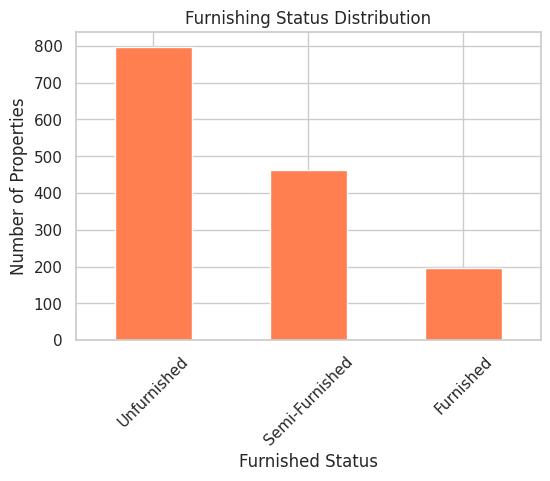

In [35]:
plt.figure(figsize=(6, 4))
df['Furnished Status'].value_counts().plot(kind='bar', color='coral')
plt.title('Furnishing Status Distribution')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()


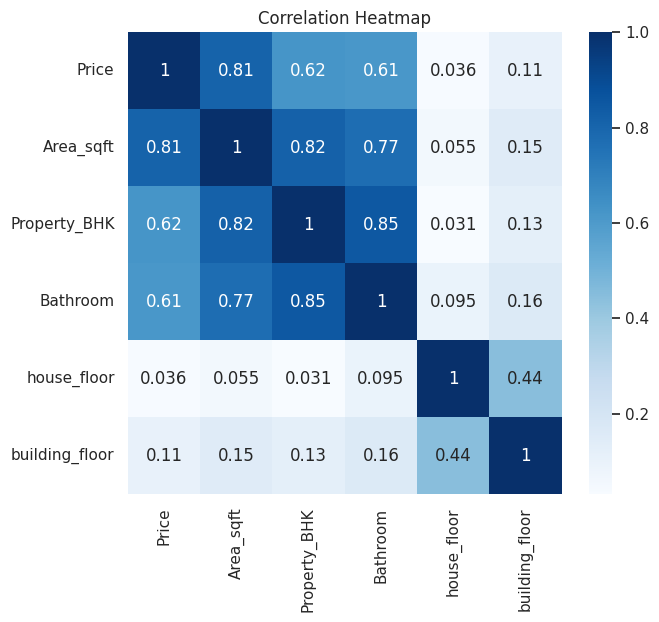

In [36]:
plt.figure(figsize=(7, 6))
sns.heatmap(df[['Price', 'Area_sqft', 'Property_BHK', 'Bathroom', 'house_floor', 'building_floor']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


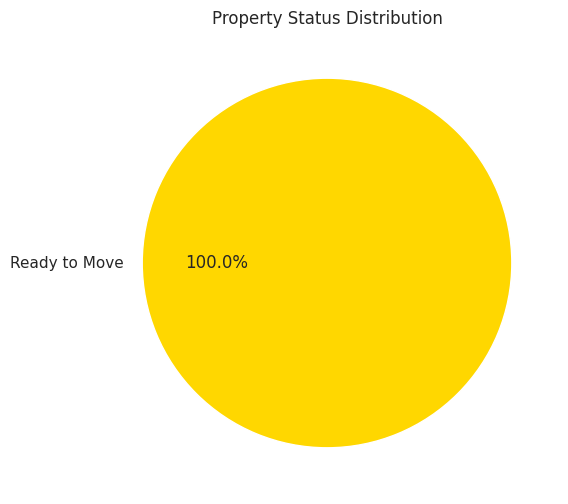

In [37]:
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), colors=['gold', 'lightgreen'])
plt.title('Property Status Distribution')
plt.ylabel('')
plt.show()


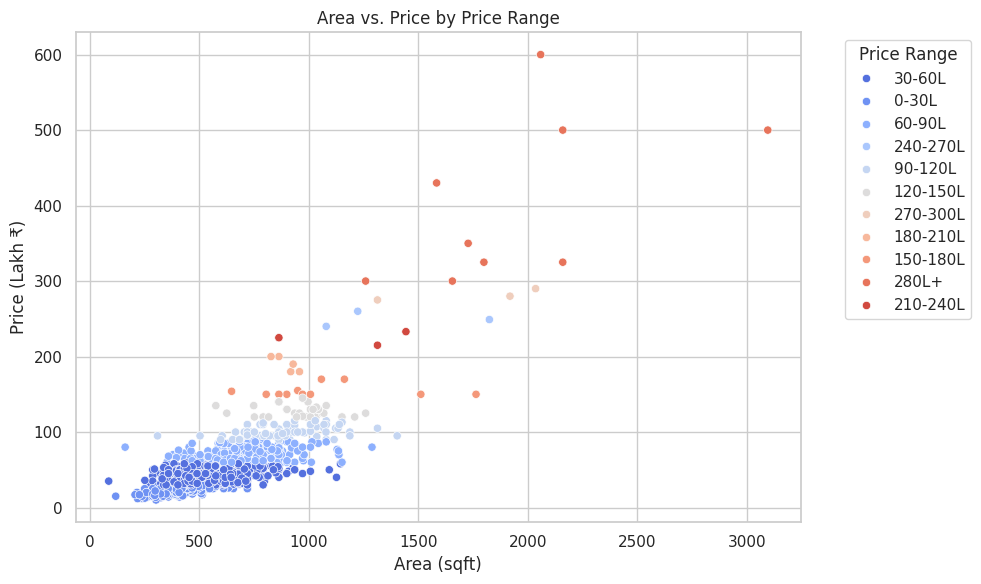

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Price to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area_sqft'] = pd.to_numeric(df['Area_sqft'], errors='coerce')

# Price Range Mapping
def map_price_range(price):
    if pd.isna(price):
        return 'Unknown'
    for start in range(0, 280, 30):
        end = start + 30
        if start <= price < end:
            return f'{start}-{end}L'
    return '280L+'

# Area Range Mapping
def map_area_range(area):
    if pd.isna(area):
        return 'Unknown'
    for start in range(0, 1000, 200):
        end = start + 200
        if start <= area < end:
            return f'{start}-{end} sqft'
    return '1000+ sqft'

# Apply Mapping
df['Price_Range'] = df['Price'].map(map_price_range)
df['Area_Range'] = df['Area_sqft'].map(map_area_range)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area_sqft', y='Price', hue='Price_Range', palette='coolwarm')
plt.title('Area vs. Price by Price Range')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (Lakh ₹)')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
df['Area_sqft'].max()


3096

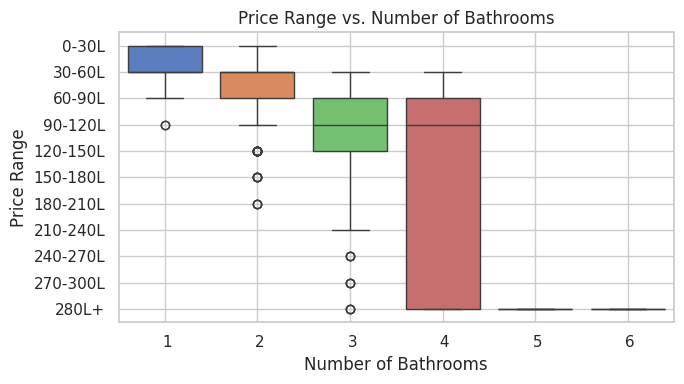

In [40]:
from pandas.api.types import CategoricalDtype

# Define the correct order for price ranges
price_range_order = [
    '0-30L', '30-60L', '60-90L', '90-120L', '120-150L', '150-180L',
    '180-210L', '210-240L', '240-270L', '270-300L', '280L+'
]

# Set as ordered categorical
price_cat = CategoricalDtype(categories=price_range_order, ordered=True)
df['Price_Range'] = df['Price_Range'].astype(price_cat)

# Now plot
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Bathroom', y='Price_Range', palette='muted')
plt.title('Price Range vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price Range')
plt.grid(True)
plt.tight_layout()
plt.show()


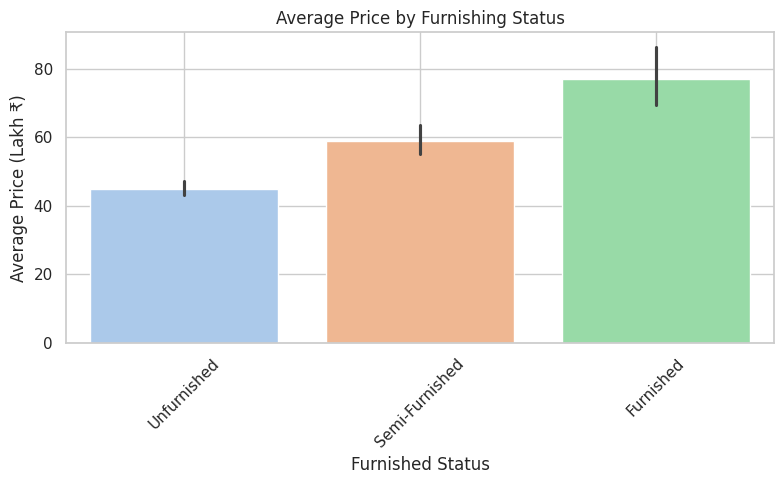

In [41]:
# Map price ranges (you already did this part)
def map_price_range(price):
    if pd.isna(price):
        return 'Unknown'
    for start in range(0, 280, 30):
        end = start + 30
        if start <= price < end:
            return f'{start}-{end}L'
    return '280L+'

df['Price_Range'] = df['Price'].map(map_price_range)

# Barplot (Furnished Status vs Average Price)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Furnished Status', y='Price', palette='pastel', estimator='mean')  # 'mean' is default
plt.title('Average Price by Furnishing Status')
plt.xticks(rotation=45)
plt.ylabel('Average Price (Lakh ₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
df.columns

Index(['Area_sqft', 'Property_BHK', 'Furnished Status', 'Bathroom', 'Society',
       'Price', 'Status', 'house_floor', 'building_floor', 'Price_Range',
       'Area_Range'],
      dtype='object')

In [43]:
df.columns=df.columns.str.replace('Furnished Status','Furnished_Status')

In [44]:
df.dtypes

,0
Area_sqft,int64
Property_BHK,object
Furnished_Status,object
Bathroom,object
Society,object
Price,float64
Status,object
house_floor,object
building_floor,object
Price_Range,object


In [45]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,house_floor,building_floor,Price_Range,Area_Range
7,392,1,Unfurnished,1,Ishwar River Residency,32.0,Ready to Move,12,12,30-60L,200-400 sqft
8,471,1,Unfurnished,1,Kohinoor Majesty,21.5,Ready to Move,5,9,0-30L,400-600 sqft
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28.0,Ready to Move,1,3,0-30L,400-600 sqft
11,517,1,Unfurnished,1,Blossom,35.0,Ready to Move,2,11,30-60L,400-600 sqft
13,645,1,Unfurnished,2,Raga Homes,37.0,Ready to Move,10,11,30-60L,600-800 sqft
...,...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80.0,Ready to Move,1,15,60-90L,600-800 sqft
1496,403,1,Semi-Furnished,1,Lotus Apartment,30.0,Ready to Move,3,4,30-60L,400-600 sqft
1497,454,1,Unfurnished,1,Florida Minis,40.0,Ready to Move,2,5,30-60L,400-600 sqft
1498,491,1,Unfurnished,1,Swaraj Complex,32.0,Ready to Move,1,7,30-60L,400-600 sqft


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

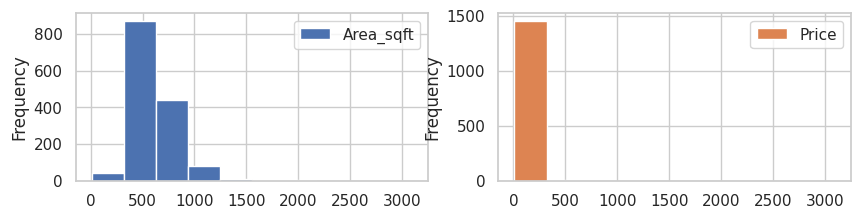

In [46]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

,0
Area_sqft,"Axes(0.125,0.712609;0.352273x0.167391)"
Price,"Axes(0.547727,0.712609;0.352273x0.167391)"


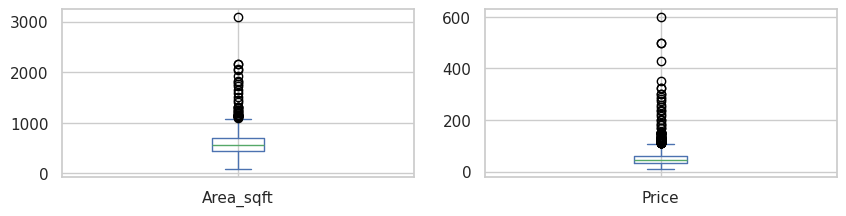

In [47]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

In [48]:
df['Price'] = df['Price'].astype(int).astype(str)
df['Price'] = df['Price'].str.replace('.0', '', regex=False)

In [49]:
df['Price'] = df['Price'].astype(str).astype(int)

In [50]:
df.isna().sum()

,0
Area_sqft,0
Property_BHK,0
Furnished_Status,0
Bathroom,0
Society,0
Price,0
Status,0
house_floor,35
building_floor,35
Price_Range,0


In [51]:
df=df.dropna(subset=['house_floor'])

<Axes: xlabel='Price', ylabel='house_floor'>

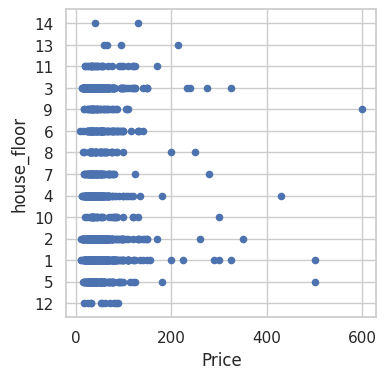

In [52]:
df.plot(kind='scatter', x='Price', y='house_floor', figsize=(4, 4))

In [53]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,house_floor,building_floor,Price_Range,Area_Range
7,392,1,Unfurnished,1,Ishwar River Residency,32,Ready to Move,12,12,30-60L,200-400 sqft
8,471,1,Unfurnished,1,Kohinoor Majesty,21,Ready to Move,5,9,0-30L,400-600 sqft
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,Ready to Move,1,3,0-30L,400-600 sqft
11,517,1,Unfurnished,1,Blossom,35,Ready to Move,2,11,30-60L,400-600 sqft
13,645,1,Unfurnished,2,Raga Homes,37,Ready to Move,10,11,30-60L,600-800 sqft
...,...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,Ready to Move,1,15,60-90L,600-800 sqft
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,Ready to Move,3,4,30-60L,400-600 sqft
1497,454,1,Unfurnished,1,Florida Minis,40,Ready to Move,2,5,30-60L,400-600 sqft
1498,491,1,Unfurnished,1,Swaraj Complex,32,Ready to Move,1,7,30-60L,400-600 sqft


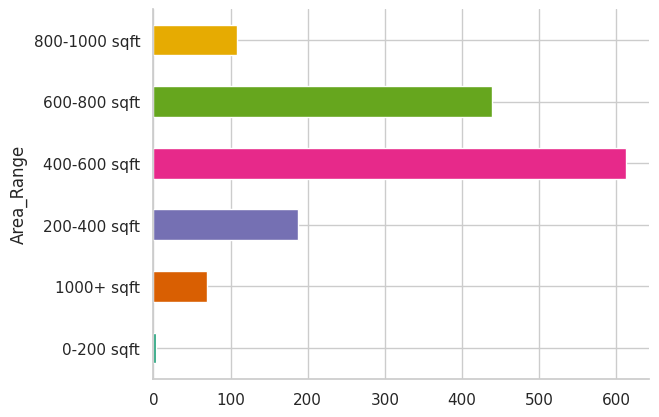

In [56]:
# @title Area_Range

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Area_Range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

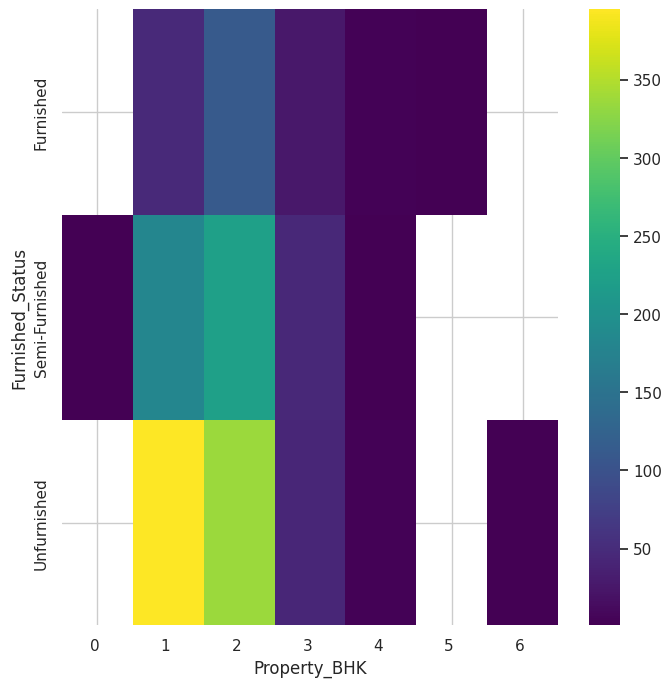

In [55]:
# @title Property_BHK vs Furnished_Status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Furnished_Status'].value_counts()
    for x_label, grp in df.groupby('Property_BHK')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Property_BHK')
_ = plt.ylabel('Furnished_Status')

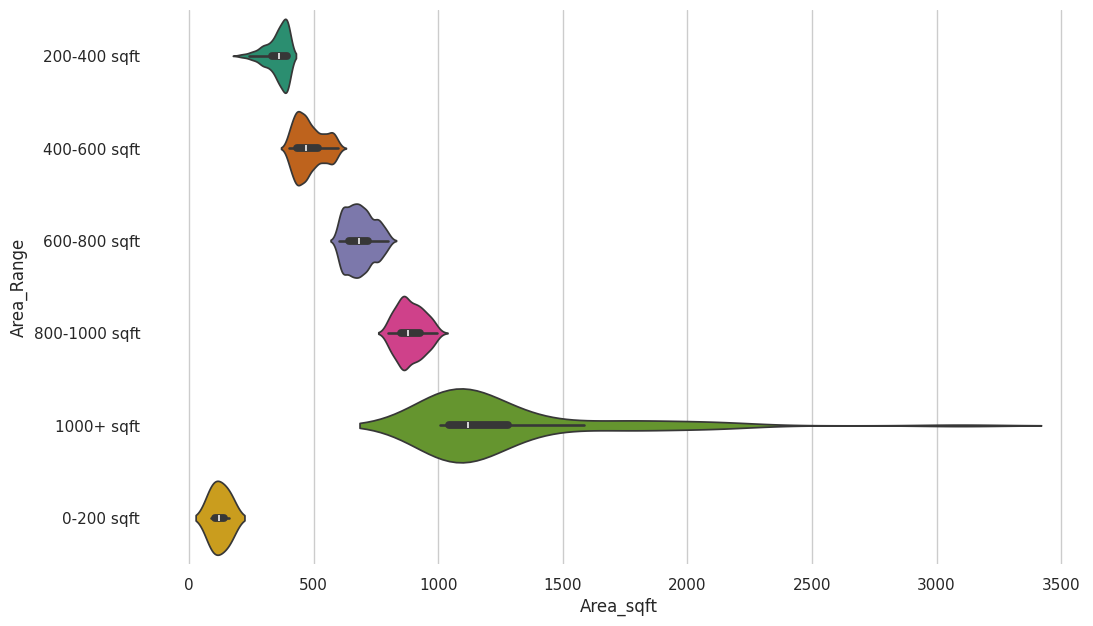

In [54]:
# @title Area_Range vs Area_sqft

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Area_Range'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Area_sqft', y='Area_Range', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)